# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
X_train = pd.read_csv("X_train_02.csv")
X_test = pd.read_csv("X_test_02.csv")
y_train = pd.read_csv("y_train.txt")
y_test = pd.read_csv("y_test.txt")

In [41]:
X_test = X_test.iloc[:len(y_test)]
X_train = X_train.iloc[:len(y_train)]

In [42]:
X_train.rename(columns={'subject_train': 'subject'}, inplace = True)
X_test.rename(columns={'subject_test': 'subject'}, inplace = True)

In [43]:
X_test.columns


Index(['Ordem', 'subject', 'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y',
       'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y',
       'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=563)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [45]:
clf = DecisionTreeClassifier(random_state=2360873, max_depth=4).fit(X_train, y_train)

In [46]:
# Obtendo as importâncias das features
importances = clf.feature_importances_

# Obtendo os índices das três variáveis mais importantes
top_indices = importances.argsort()[-3:][::-1]

feature_names = X_train.columns

top_features = [feature_names[i] for i in top_indices]

print("As três variáveis com maior importância são:", top_features)

As três variáveis com maior importância são: ['tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [57]:
X_train = X_train[['tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']]
X_valid = X_valid[['tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']]
X_test = X_test[['tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']]

In [58]:
%%time
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: total: 62.5 ms
Wall time: 84.4 ms


In [59]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

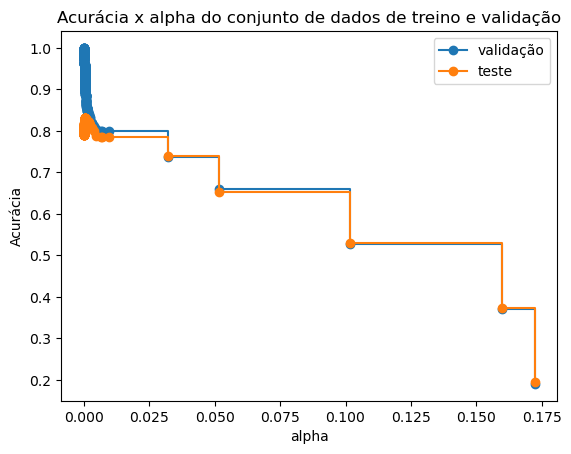

In [60]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [61]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 83.13


DecisionTreeClassifier(ccp_alpha=0.0005441683294032287, random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [64]:
acuracia_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, X_test, y_test);

Acurácia: 65.38


NameError: name 'plot_confusion_matrix' is not defined

Acurácia: 65.38


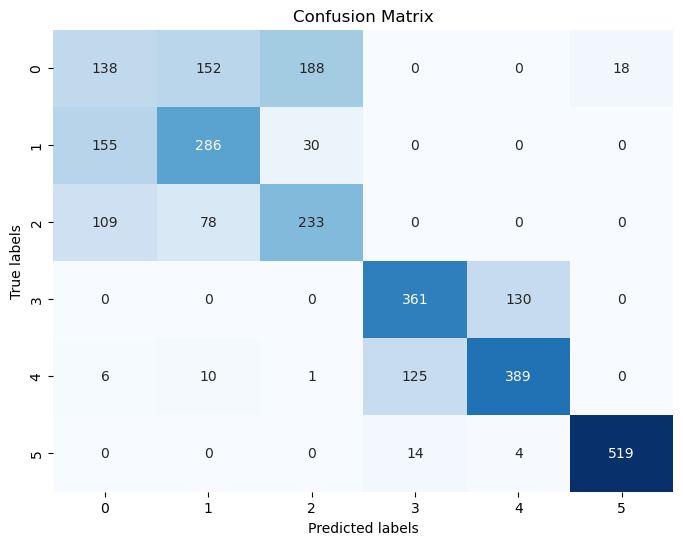

In [71]:
# Assuming melhor_arvore is your trained model
y_pred = melhor_arvore.predict(X_test)

# Calculate accuracy on test set
acuracia_teste = accuracy_score(y_test, y_pred)

# Print accuracy
print(f'Acurácia: {acuracia_teste*100:.2f}')

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()